# Working with TIFFs in Python using numpy

In [1]:
from PIL import Image as PIL_Image
TIFfilepath = 'EBIC_measurement/10kv-15KX-97pA-50nAV-EBIC.TIF'
im = PIL_Image.open(TIFfilepath)

In [2]:
from IPython.display import Image

In [3]:
orignalimage_jpg = Image(filename='EBIC_measurement/10kv-15KX-97pA-50nAV-EBIC.jpg')

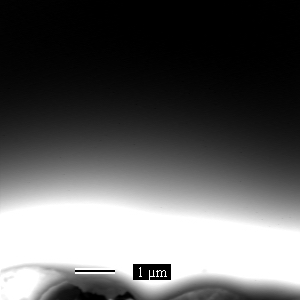

In [4]:
orignalimage_jpg

In [5]:
import numpy as np
imarray = np.array(im)

In [6]:
imarray.shape

(300, 300)

In [7]:
imarray

array([[  2,   2,   2, ...,   0,   0,   0],
       [  2,   2,   2, ...,   1,   1,   1],
       [  2,   2,   2, ...,   0,   0,   0],
       ..., 
       [255, 250, 248, ...,  77,  79,  81],
       [255, 254, 250, ...,  71,  74,  76],
       [255, 255, 252, ...,  69,  72,  73]], dtype=uint8)

In [8]:
imarray_linescan = imarray[:,50]

In [9]:
imarray_linescan.shape

(300,)

In [10]:
imarray_linescan

array([  1,   1,   1,   1,   1,   0,   1,   1,   1,   1,   1,   2,   1,
         1,   1,   0,   0,   1,   0,   2,   1,   1,   0,   2,   1,   1,
         1,   1,   1,   2,   0,   1,   1,   1,   2,   0,   1,   1,   1,
         1,   2,   1,   1,   2,   1,   2,   2,   1,   2,   2,   2,   3,
         2,   2,   2,   3,   2,   4,   2,   3,   2,   3,   4,   5,   3,
         4,   3,   3,   5,   4,   5,   5,   5,   7,   5,   5,   6,   6,
         7,   7,   7,   7,   8,   8,   9,  10,   9,  10,  11,  10,  10,
        10,  12,  12,  12,  14,  12,  15,  13,  15,  15,  16,  16,  17,
        19,  18,  19,  20,  20,  22,  22,  24,  23,  24,  25,  26,  28,
        27,  28,  29,  30,  31,  33,  33,  34,  35,  36,  38,  37,  40,
        41,  42,  43,  43,  48,  47,  49,  50,  52,  53,  54,  57,  58,
        59,  61,  61,  64,  66,  68,  70,  71,  73,  76,  76,  79,  81,
        82,  86,  88,  91,  92,  95,  98,  98, 102, 104, 106, 109, 112,
       114, 117, 118, 123, 125, 129, 131, 135, 138, 141, 145, 14

# Plot EBIC line scan

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0, 8, 300)
plt.plot(x, imarray_linescan)
plt.title('A EBIC line scan')

In [ ]:
myfile = open('EBIC_measurement/raw.dat')
data = myfile.decode('utf-8').read()
len(data)